In [1]:
import os
import glob
import shutil
import random

In [2]:
os.chdir('/Users/kshitijaupasham/Desktop/Sign-Language-Digits-Dataset-master/')

if(os.path.isdir('train/1') is False):
    print("INSIDE")
    for i in range(10):
        os.makedirs('train/'+str(i))
        os.makedirs('test/'+str(i))
    for i in range(10):
        os.chdir('/Users/kshitijaupasham/Desktop/Sign-Language-Digits-Dataset-master/Dataset/'+str(i)+'/')
        
        for img in random.sample(glob.glob('IMG*'),184):
            shutil.move(img,'/Users/kshitijaupasham/Desktop/Sign-Language-Digits-Dataset-master/train/'+str(i))
        for img in random.sample(glob.glob('IMG*'),20):
            shutil.move(img,'/Users/kshitijaupasham/Desktop/Sign-Language-Digits-Dataset-master/test/'+str(i))
        
    
os.chdir('../../')        

In [3]:
thresh = 0.9851

In [4]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > thresh):   
            self.model.stop_training = True

In [5]:
callbacks = myCallback()

In [6]:
train_path = '/Users/kshitijaupasham/Desktop/Sign-Language-Digits-Dataset-master/train/'
test_path = '/Users/kshitijaupasham/Desktop/Sign-Language-Digits-Dataset-master/test/'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(train_path,target_size=(100, 100),color_mode='rgb',class_mode='categorical',batch_size=128)
test = test_datagen.flow_from_directory(test_path,target_size=(100, 100),color_mode='rgb',class_mode='categorical',batch_size=128)

Found 1840 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


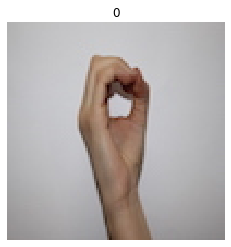

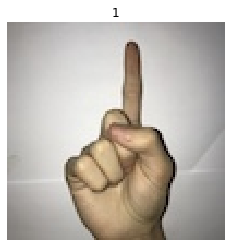

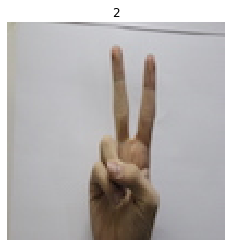

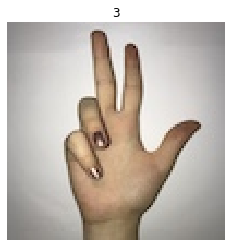

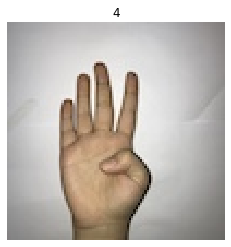

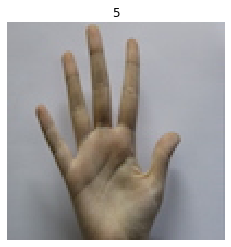

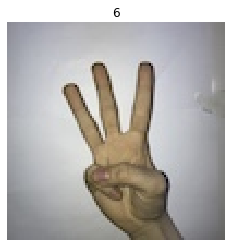

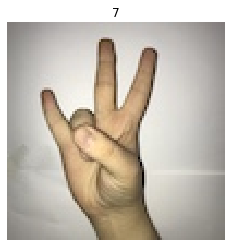

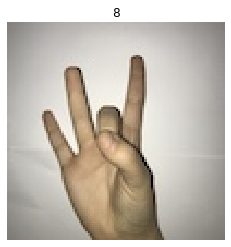

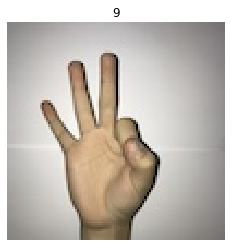

In [8]:
import cv2
import matplotlib.pyplot as plt

imgs = ['/IMG_1128.JPG',
    '/IMG_4110.JPG',
    '/IMG_1262.JPG',
    '/IMG_4043.JPG',
    '/IMG_4083.JPG',
    '/IMG_1327.JPG',
    '/IMG_4302.JPG',
    '/IMG_5315.JPG',
    '/IMG_5274.JPG',
    '/IMG_4865.JPG']

i=0
for j in imgs:

    img = cv2.imread('/Users/kshitijaupasham/Desktop/Sign-Language-Digits-Dataset-master/train/' + str(i) + j) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(i)
    plt.axis('off')
    i=i+1
    plt.show()




In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,3),padding='same', kernel_initializer='he_uniform'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size = (3,3),activation ='relu', kernel_initializer='he_uniform'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size = (3,3), kernel_initializer='he_uniform',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))




In [9]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0

In [11]:
train_steps=train.n//train.batch_size
validation_steps=test.n//test.batch_size
history = model.fit(train,steps_per_epoch=train_steps,validation_data=test,validation_steps=validation_steps,epochs=30, callbacks=[callbacks])

Epoch 1/30
14/14 [==============================] - 59s 4s/step - loss: 5.0390 - accuracy: 0.1004 - val_loss: 2.2958 - val_accuracy: 0.1094
Epoch 2/30
14/14 [==============================] - 60s 4s/step - loss: 2.2939 - accuracy: 0.1308 - val_loss: 2.2943 - val_accuracy: 0.1328
Epoch 3/30
14/14 [==============================] - 56s 4s/step - loss: 2.1843 - accuracy: 0.2062 - val_loss: 1.9978 - val_accuracy: 0.2188
Epoch 4/30
14/14 [==============================] - 57s 4s/step - loss: 2.0450 - accuracy: 0.2909 - val_loss: 1.7023 - val_accuracy: 0.4609
Epoch 5/30
14/14 [==============================] - 58s 4s/step - loss: 1.5694 - accuracy: 0.4685 - val_loss: 1.2450 - val_accuracy: 0.6016
Epoch 6/30
14/14 [==============================] - 56s 4s/step - loss: 1.1594 - accuracy: 0.6086 - val_loss: 0.6485 - val_accuracy: 0.8125
Epoch 7/30
14/14 [==============================] - 56s 4s/step - loss: 0.9318 - accuracy: 0.6986 - val_loss: 0.5993 - val_accuracy: 0.8281
Epoch 8/30
14/14 [==

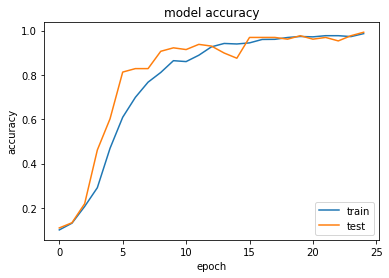

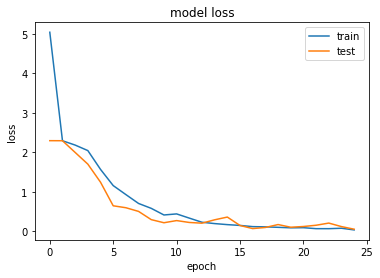

In [12]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
99.22

99.22